# 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

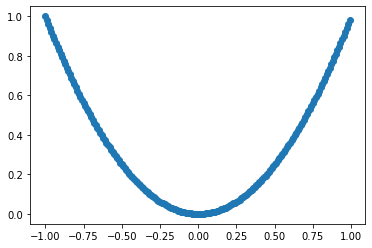

In [2]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [3]:
print(x[:10])#-1에서 1까지 0.01간격
print(y[:10])#x**

[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91]
[1.     0.9801 0.9604 0.9409 0.9216 0.9025 0.8836 0.8649 0.8464 0.8281]


In [4]:
print(len(x))
print(x.shape) # 1차원 200

200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

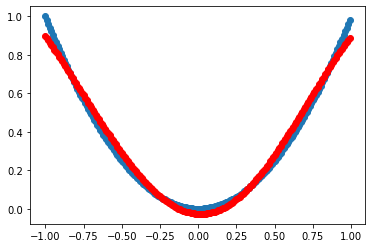

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# DNN모델 구조 정의
model = keras.Sequential() #모델 껍데기를 하나 생성
model.add(Input(1)) #입력층
model.add(Dense(10, activation='tanh')) #은닉층 노드 10개 #거의 relu씀. 여기서는 실습을 위해 tanh쓴거임.
model.add(Dense(10, activation='tanh')) #은닉층 노드 10개
model.add(Dense(1)) #출력층 노드 1개 
#dNN이렇게 구성됨.

#--------------------------------------

#학습에 사용되는
#모델에 optimizer loss 엮음.
#딥러닝 loss funtion 으로 mse 사용. 실제 출력값과 기대값과의 차이 에러를 제곱 스쿼어드,
#optimizer로 SDG사용
# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse") #준비 완료


#-------------------------------------

#학습
#x값을 입력으로 y값을 출력으로 학습
#첫번째 꺼내서 업데이트 두번째 꺼내서 업데이트 그런데 학습이 완료가 되지 않으면, 다시한번 또 씀. 1000epochs는 데이터를 천번 반복하면서 학습하겠다.
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#---------------------------------
#학습이 끝나면
# 예측 x값넣어서 예측해봐. 그 결과는 y_에 저장.
y_ = model.predict(x)

#-------------------------------
#예측 결과보기
# 결과 그래프로 보기
plt.scatter(x,y) # 정답 (y는 정답이고)
plt.scatter(x,y_,color='r') # 결과 (y_ 예측한 값임.) 컬러는 레드로 출력
plt.show() #비슷하게 학습된

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0297
loss= 0.0012920427834615111
mae= 0.0296502523124218


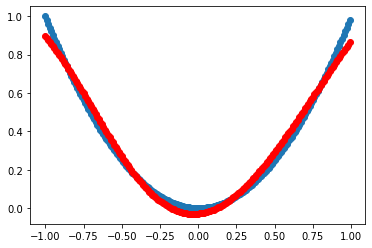

In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mae"]) #성능을 평가히기 위한 지표로 mae사용함.


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#--------------------------------------------------------------------
#학습에 사용된것을 가지고 평가하는 것은 원래 안됨. 결과 인정 안해줌. ( 걍 여기선 그렇게한 거임)
#train 데이터와 test데이터는 따로 사용해야함. train으로 평가 사용하면 안됨.
loss, mae = model.evaluate(x, y) # ADD 
# 둘다 값이 작을수록 학습이 잘 된 것임.
print("loss=", loss) # ADD
print("mae=", mae) # ADD
#--------------------------------------------------------------------


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mae가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

In [7]:
print(x.shape)
print(x.shape[0])
#print(x)
#print(y)

(200,)
200


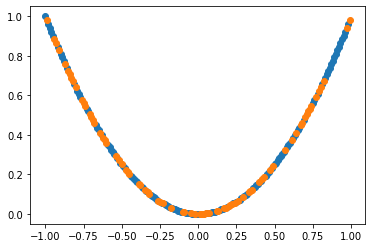

In [8]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x) #x의 데이터 순서들을 무작위로 섞음.
y = x**2

split_index = int(x.shape[0]*0.6) #200*0.6 = 120 슬라이스할 기준 인덱스 지정.

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 5ms/step - loss: 0.0029 - mae: 0.0464
loss= 0.002932736650109291
mae= 0.04642008990049362


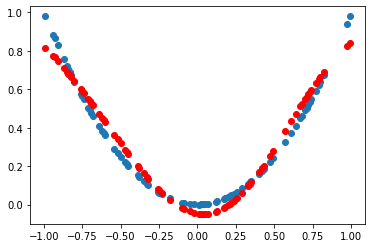

In [9]:
# DNN모델 구조 정의
model = keras.Sequential() #모델 껍데기를 하나 생성
model.add(Input(1)) #입력층 노드 1개
model.add(Dense(10, activation='tanh')) #은닉층 노드 10개
model.add(Dense(10, activation='tanh')) #은닉층 노드 10개
model.add(Dense(1)) #출력층 노드 1개

#----------------

# 컴파일 : 모델 + optimizer + loss, 평가는 mae로
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#-----------------

#학습. 위에서 랜덤값으로 인덱싱한거 사용 
#epochs 1000 -> 데이터를 천번 반복하면서 학습하겠다.
#입력넣고 그것에 대해 출력까지 계산하고, 출력된 것과 실제 출력되야하는 값들 사이의 에러를 계산하고
#그 에러를 가지고 백워드해서 백프로파게이션하고 웨이트를 업데이트함.
#데이터하나뿐만 아니라 전달된 데이터 전체 다하고, 다한다음 에폭 수만큼(1000번)을 다시 반복함.
# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

#-----------------
# test데이터를 가지고 모델 평가.
# loss, mae = model.evaluate(x, y)
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#-------------------
#예측한 결과를 y_에 저장
# y_ = model.predict(x)
y_ = model.predict(test_x)

#------------------
#결과
# plt.scatter(x,y)
plt.scatter(test_x,test_y) #학습안한거 test_x, test_y 데이터
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r') #학습한거 예측 값. 빨간색으로 출력
plt.show() #그래프 그려줘.

#모델 훈련은 tran_x, tran_y로 시킴.
#test_x를 모델에 입력해서 예측값 y_를 받음.
#훌륭한 모델이라면 test_x일때의 정답인 test_y와 y_의 값의 오차는 비슷해야함.

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


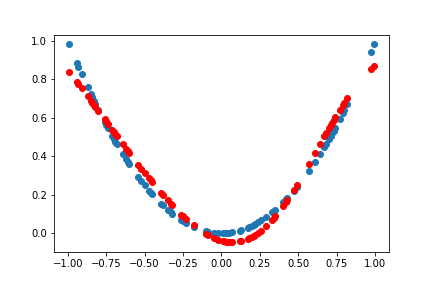

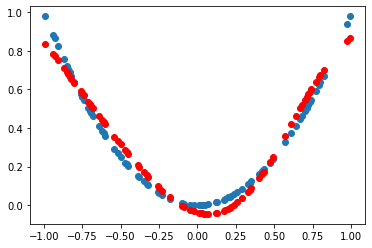

In [15]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png") # 이파일로 저장해 놔라

from IPython.display import Image
display(Image("base_result.png")) # 여기에 보여줘라

## 학습 시간을 출력

elapsed : 10.484201192855835
3/3 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0403
loss= 0.002189996186643839
mae= 0.04031642526388168


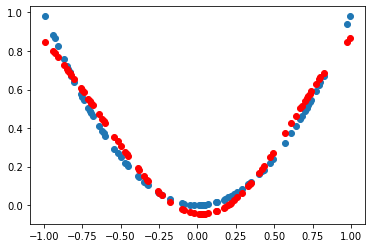

In [11]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.479185104370117


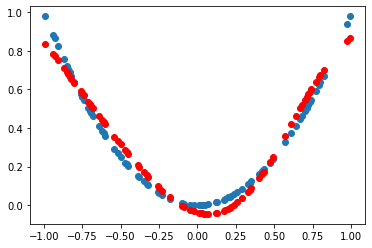

In [13]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
#------------------
model.summary() # ADD
# 파라미터의 수, 즉 각 입력노드와 출력노드에 대해 연결된 간선의 수를 뜻함.
# 각 layer 마다 (입력 노드 + 1(바이어스 노드)) * 출력 노드
# (1+1)*10 = 20

# 첫번째 아웃풋 노드가 두번째 레이어의 입력 노드가 됨.(10개) + 바이어스 노드 (1) : 2layers input node
# Dense(10,~)이므로 아웃풋 노드 10개.
# (10 + 1) *10 = 110

#마찬가지임.
# (10 + 1) * 1 = 11

# 총 141개. 모델의 크기를 의미함.
#------------------

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


## 모델 그리기

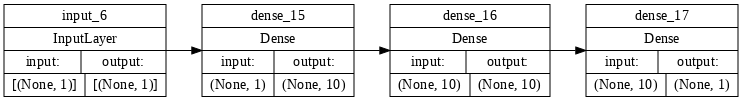

In [14]:
tf.keras.utils.plot_model(model=model, rankdir="LR", dpi=72, show_shapes=True)

# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.511210441589355
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0390
loss= 0.002740283962339163
mae= 0.038972049951553345


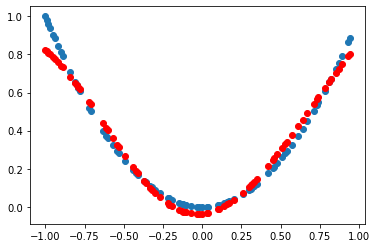

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 구조 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일 (3가지) => optimizer, loss, metrics 정의.
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
# 참고 : dnn 오로지 입력과 출력데이머나 사용.가운데 은닉층에 대해서는 밖에서 안보여서 은닉층 히든 레이어.
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어를 1개 만

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.473084688186646
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0328
loss= 0.0014731446281075478
mae= 0.03278830647468567


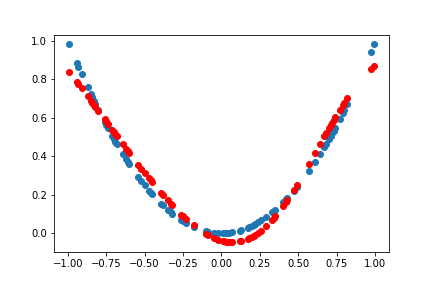

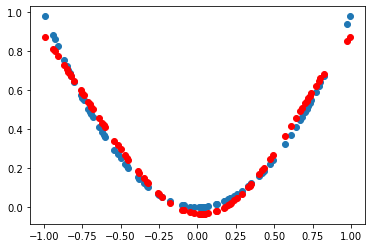

In [17]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.178383350372314
3/3 [==============================] - 0s 4ms/step - loss: 0.0827 - mae: 0.2511
loss= 0.0827234536409378
mae= 0.25111955404281616


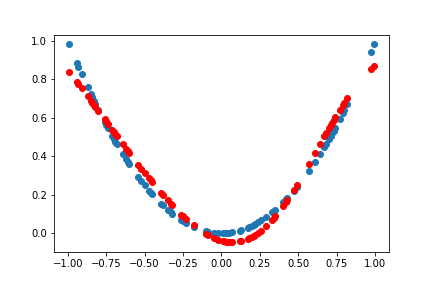

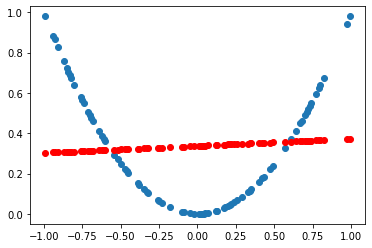

In [18]:
from tensorflow.keras.layers import Input
#히든 레이어는 무조건 하나 이상이여야함. 학습 안됨.


model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 10개로

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)               

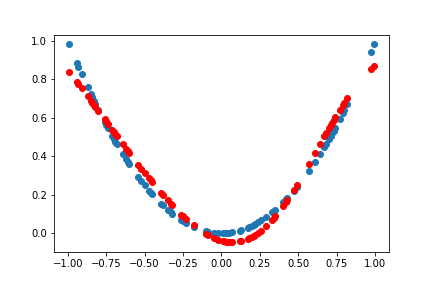

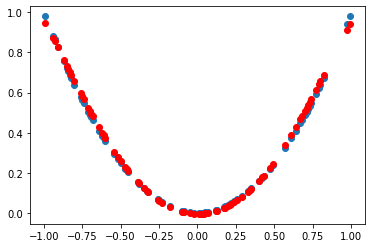

In [19]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png")) #비교 대상임.

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show() #히든 레이어 10개로 했을 때가 더 학습이 잘 된 것을 그래프를 통해 알 수 있음. (빨간색 파란색 거의 일치 하고 있음.)

10개로 했을 때 좋아진 차이가 보인다.

# node 수

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 노드 수가 1개

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
 dense_34 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.102194786071777
3/3 [==============================] - 0s 4ms/step - loss: 0.0720 - mae: 0.2155
loss= 0.07201175391674042
mae= 0.21545922756195068


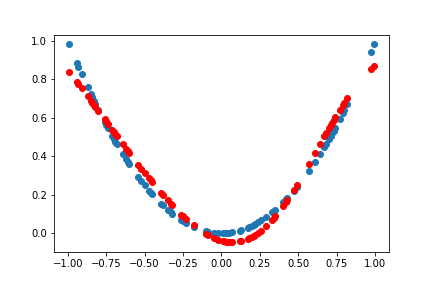

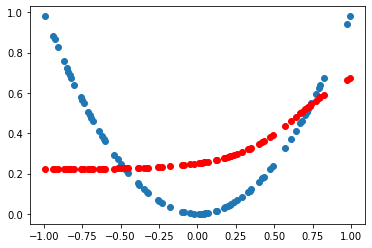

In [20]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()
#학습 잘 안됨. 노드도 적으면 안됨. 노드 1개 1개 1개 1개 했더니 결과 엉망.
#(히든레이어 무조건 한개이상-> 위에서 확인함.), 노드도 어느정도 충분히 있어야함.

1개의 경우 거의 학습이 되지 않는다.

# sin 데이터

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [21]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x) # 변경된 부분. 

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

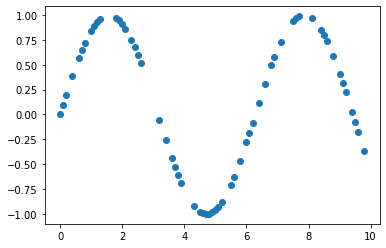

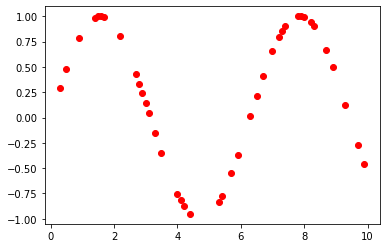

In [26]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()# 학습용 데이터 출력

plt.scatter(test_x,test_y,color="r")
plt.show()#테스트용 데이터 출력

#서로 겹치치 않는 것을 확인할 수 있음. (아직 학습전임 데이터 셋 준비 단계)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                20        
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.195772409439087
2/2 [==============================] - 0s 6ms/step - loss: 0.1547 - mae: 0.2771
loss= 0.1547468602657318
mae= 0.2770898640155792


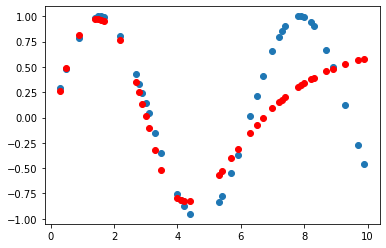

In [28]:
#DNN 모델 구조 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


#컴파일 준비
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


#학습시작 (1000epochs)
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

#평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#예측. 여기서 test_x값을 넣어 만들어진 모델에 적용함. 그 결과를 y_에 저장.
y_ = model.predict(test_x)

#결과 출력
plt.scatter(test_x,test_y) 
plt.scatter(test_x,y_,color='r')
plt.show()
#어느정도 학습은되는데 뒤에 부족한게 보임.

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [30]:
#추가 학습 함수를 두개 더 많음
#기존에 학습되어 있는거에 천번 더 학습을함.

#위에서 학습, 예측, 결과 코드 함수로 따온 것.
#매개변수에 model: 호출할 때 모델 자체를 받음. 
#천번 학습된 그 모델을 받아서, 여기서 다시 천번을 더 학습함. -> 최초 호출의 경우
#즉, 기존에 학습된 모델에 천번을 더 학습한다. 
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()
#n번만큼 루프를 돌면서 fit_one_more 호출
def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 10.265431880950928


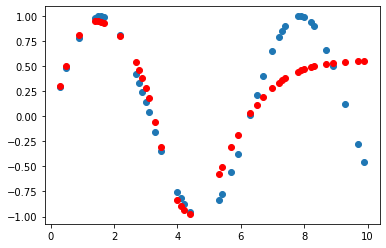

1 times fitting
elapsed : 5.85886025428772


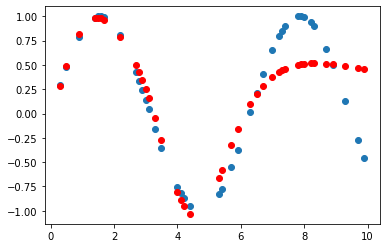

2 times fitting
elapsed : 5.961381435394287


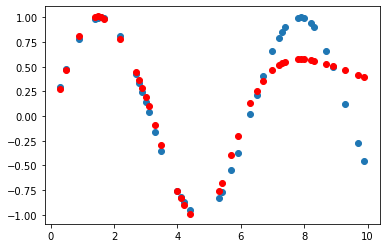

3 times fitting
elapsed : 5.849004030227661


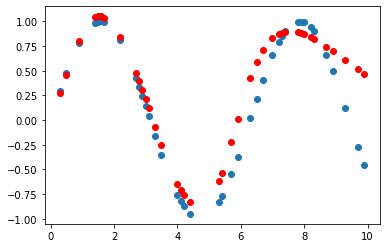

4 times fitting
elapsed : 5.8088109493255615


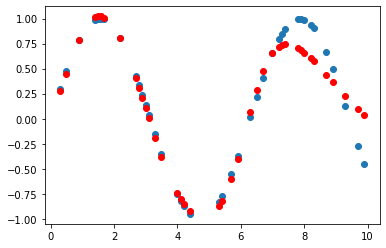

5 times fitting
elapsed : 10.259396314620972


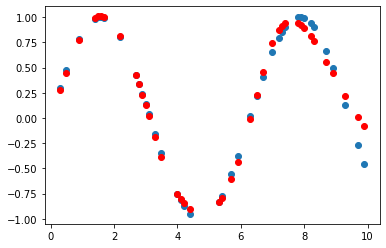

6 times fitting
elapsed : 5.858405590057373


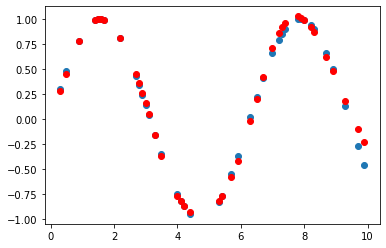

7 times fitting
elapsed : 5.834245920181274


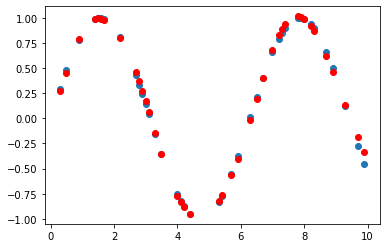

8 times fitting
elapsed : 5.859312057495117


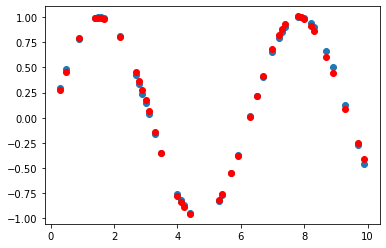

9 times fitting
elapsed : 5.858821153640747


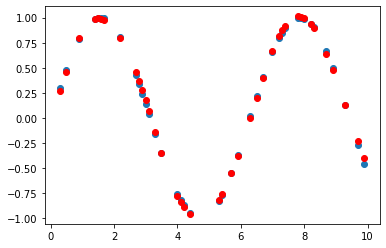

In [31]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)
# fit_one_more함수 10번 돌리는것과 같은 의미임.
# fit_one_more(model, train_x,train_y,test_x,test_y)
# fit_one_more(model, train_x,train_y,test_x,test_y)
# fit_one_more(model, train_x,train_y,test_x,test_y)
# ......
# fit_one_more(model, train_x,train_y,test_x,test_y)
# fit_one_more(model, train_x,train_y,test_x,test_y)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

gpu의 코어는 cpu 코어보다 훨씬 많이 느림.
그런데 왜 gpu 쓰면 빨라질까?
gpu 코어가 거의 10240.. 이런식으로 많이 들어있음.
많은 데이터를 병렬처리해서 시간이 많이 단축이 됨.

만약, gpu코어를 다 쓰게 되면 , 한번에 처리를 못해서 2사이클에 처리를 하는데, 이땐 느려짐.

이때, batch_size가 한번에 gpu에게 주는 데이터의 개수


<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [32]:
def build_model():

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [33]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]
## barch size가 1개일 떄, 2개 일때, 5개일때......적용

batch_size=1
elapsed : 79.0065267086029


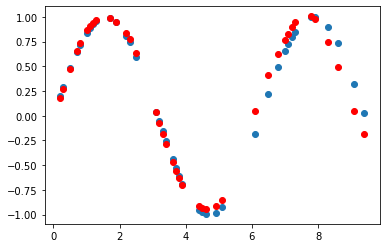

batch_size=2
elapsed : 82.15345907211304


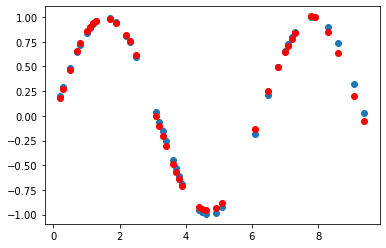

batch_size=5
elapsed : 20.714961290359497


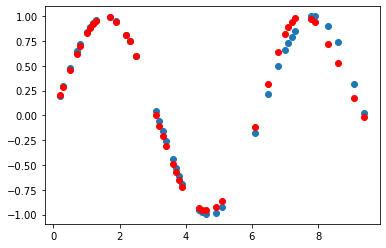

batch_size=10
elapsed : 10.413999319076538


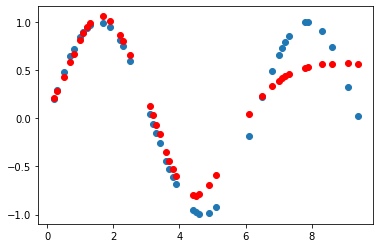

batch_size=20
elapsed : 6.071175575256348


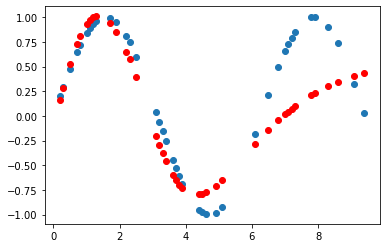

batch_size=50
elapsed : 10.52699613571167


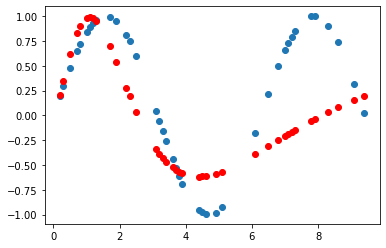

batch_size=100
elapsed : 5.416125059127808


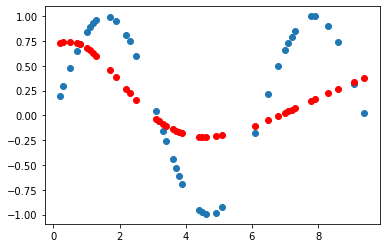

batch_size=200
elapsed : 5.395569324493408


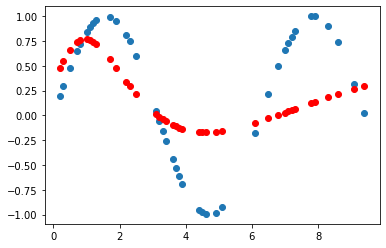

batch_size=500
elapsed : 3.8535335063934326


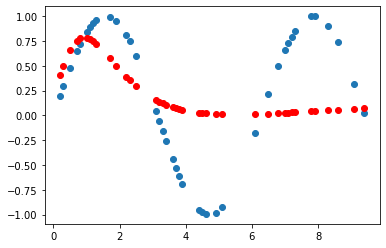

In [34]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 덜됨.

학습은 많이 시키면 많이 시킬수록 학습이 더 진행됨.
따라서 배치 사이즈를 10개로 해서 학습시간을 10배를 줄었으면,
학습을 3배 더 많이 시키면
->
전체 시간은 10에서 1/10 *3 3/10
시간은 줄어들음. 

배치사이즈로 실행시간 줄이고, 학습늘리는 방식으로 함.

# model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이


In [35]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)  ##verbose 사용법 ??
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 10)                20        
                                                                 
 dense_69 (Dense)            (None, 10)                110       
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2424 - mae: 0.4076
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1239 - mae: 0.2443
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1047 - mae: 0.2111
Epoch 4/5
3000/3000 [=

# loss 보기


In [37]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 10)                20        
                                                                 
 dense_75 (Dense)            (None, 10)                110       
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.7900 - mae: 0.7078
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4766 - mae: 0.6028
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4650 - mae: 0.6024
Epoch 4/1000
3/3 [======================

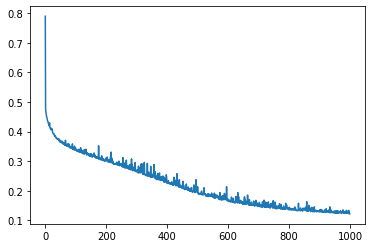

In [38]:
plt.plot(history.history['loss']) #loss 떨어지네를 그림으로 볼 수 있음.
plt.show()

# 학습 시에 validation

train loss를 찍으면 알아서 매끄럽게 잘 내려가는게 보이는데,
test loss를 찍으면 어느 순간에 over fitting이 발생함.( 올라가는 그래프)(higher가 발생)

딥러닝에서 특히 중요한것이, 모델이 큼. 데이터가 많아야함.
저 오버피팅이 발생하는것은 데이터가 충분히 많지 않기 때문에 발생함.
따라서, 저 higher 처리를 해줘야함.

----------------------------

#  <<학습시     사용>>         |  <<테스트시 사용>>
# [ train  | validation ] |  [   test    ]

train data -> 학습시, 학습에 사용함.

validation data -> 학습시, 학습에 사용 안함. 계산해서 업데이트 하는데 사용하지 않음. loss구하는데 사용함. 모델 업데이트에 사용안함.
<br>
<br>
validation loss 그리는 이유.

train loss는 학습시키면 계속 떨어짐. 근데 이게 성능이 아니라,
학습에 사용되지 않은 데이터를 가지고 loss를 그려서 올라가는 시점, overfitting을 찾기 위함.



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

## model.fit()의 validation_data

In [40]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 10)                20        
                                                                 
 dense_78 (Dense)            (None, 10)                110       
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 22.426445245742798


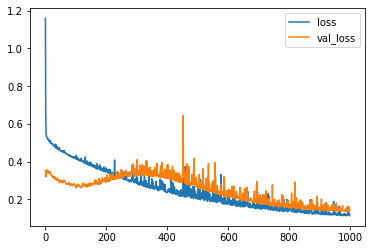

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

#validation_split
#학습할때, 전달한 데이터의 10퍼센트는 케라스 너가 따로 떼어 놓고, 0.9는 트레인 데이터로 0.1은 벨리데이션 데이터로 해서 학습을 시켜.
#그러면서 train loss, validation loss 까지 다 구해봐. 이걸 history에 전부 저장.
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 10)                20        
                                                                 
 dense_91 (Dense)            (None, 10)                110       
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 23.023099184036255


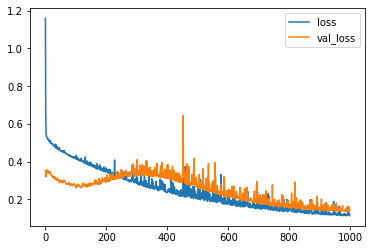

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 10)                20        
                                                                 
 dense_94 (Dense)            (None, 10)                110       
                                                                 
 dense_95 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 3s - loss: 0.2725 - mae: 0.4368 - 3s/epoch - 1ms/step
Epoch 2/5
3000/3000 - 3s - loss: 0.1176 - mae: 0.2418 - 3s/epoch - 1ms/step
Epoch 3/5
3000/3000 - 3s - loss: 0.0685 - mae: 0.1681 - 3s/epoch - 1ms/step
Epoch 4/5
3000/3000 - 3s - loss: 0.0309 - mae: 0.1067 - 3s/epoch - 1ms/step
Epoch 5/5
3000/

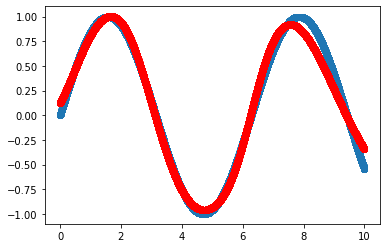

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

# 모델 저장과 로딩

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                20        
                                                                 
 dense_81 (Dense)            (None, 10)                110       
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.091389417648315
2/2 [==============================] - 0s 6ms/step - loss: 0.1031 - mae: 0.2358
loss= 0.10310740768909454
mae= 0.23579105734825134


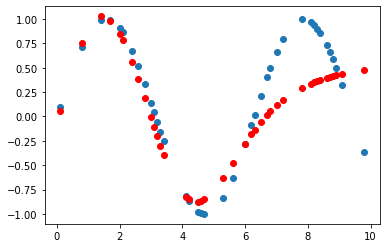

In [43]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 모델 저장

In [44]:
model.save('my_model.h5')

!ls -al

total 60
drwxr-xr-x 1 root root  4096 Jan 18 18:16 .
drwxr-xr-x 1 root root  4096 Jan 18 15:38 ..
-rw-r--r-- 1 root root 12161 Jan 18 16:33 base_result.png
drwxr-xr-x 4 root root  4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root  7276 Jan 18 16:28 model.png
-rw-r--r-- 1 root root 20736 Jan 18 18:16 my_model.h5
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data


모델 로딩

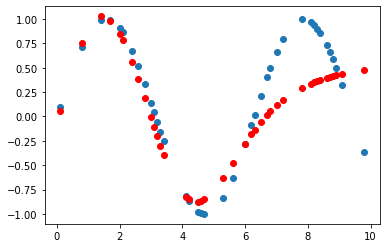

In [45]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# Optimizer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

```
# 현재 learning_rate~쓰여 있는 값들은 dedault로 했을때의 값들임.
#디폴트를 권장하고, 처음 시작할때는 디폴트로 학습을 시키고, 얘네들이 마구 떨어지다가 위아래 진동하면 그 값을 0.1배 해줌. 그럼다시 쭉 내려가고 다시 진동...등
# SGD
model.compile(optimizer="SGD", ...)
model.compile(optimizer=SGD(learning_rate=0.01), ...)

# Adam
model.compile(optimizer="Adam", ...)
model.compile(optimizer=Adam(learning_rate=0.001), ...)

# Adagrad
model.compile(optimizer="Adagrad", ...)
model.compile(optimizer=Adagrad(learning_rate=0.001), ...)

# RMSProp
model.compile(optimizer="RMSprop", ...)
model.compile(optimizer=RMSprop(learning_rate=0.001), ...)
```

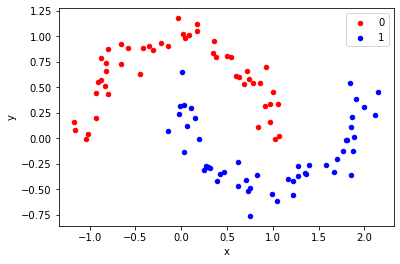

In [ ]:
from sklearn.datasets import make_moons
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.1, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


## SGD

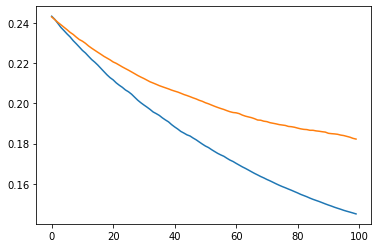

In [ ]:
optimizer = "SGD"


model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

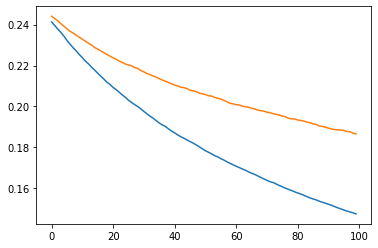

In [ ]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01)


model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

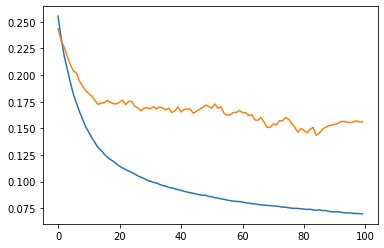

In [ ]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01*10)


model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## Adam

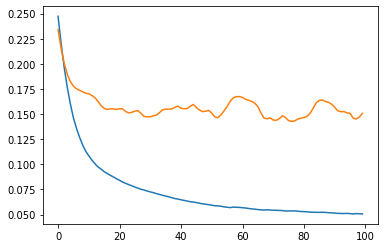

In [ ]:
optimizer = "Adam"


model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

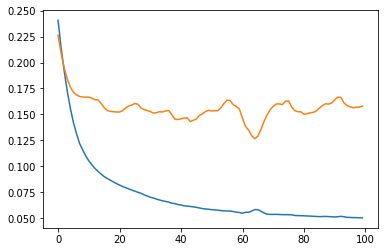

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer = "Adam"
optimizer = Adam(learning_rate=0.001)



model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## Adagrad

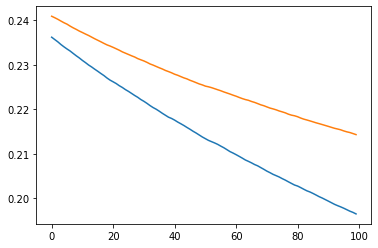

In [ ]:
optimizer = "Adagrad"



model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

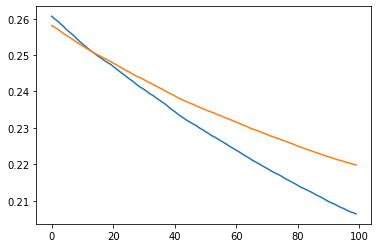

In [ ]:
from tensorflow.keras.optimizers import Adagrad

# optimizer = "Adagrad"
optimizer = Adagrad(learning_rate=0.001)



model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## RMSprop

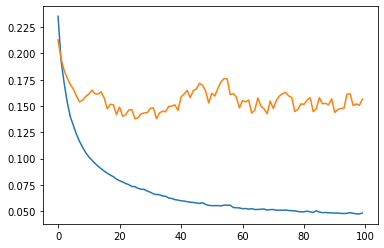

In [ ]:
optimizer = "RMSprop"



model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

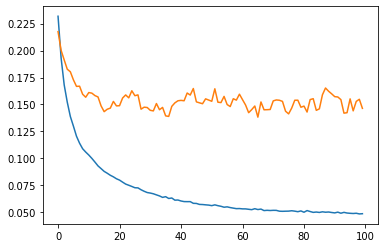

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# optimizer = "RMSprop"
optimizer = RMSprop(learning_rate=0.001)



model = keras.Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

# 다양한 입출력

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

#dnn은 함수를 근사화할 수 있는 능력이 있음.
#입력과 출력쌍가지고, 학습해서 둘 사이의 관계를 학습함.

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 10)                30        
                                                                 
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 dense_85 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 41.203455209732056
2/2 [==============================] - 0s 7ms/step - loss: 5.4300e-04 - mae: 0.0172
loss= 0.0005429986049421132
mae= 0.017200622707605362


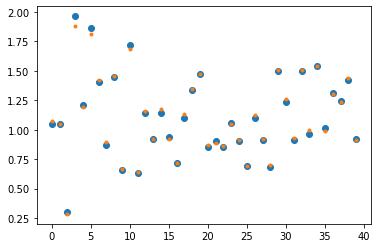

In [47]:
# 입력데이터
#100개의 데이터가 있음.(100줄), 하나의 데이터는 2개의 column, feature, 숫자가 있다.
# ex: 사과의 feature 2개 : 색, 크기 => 하나의 데이터는 크기와 색깔 두개의 숫자로 이루어져있고,
#     이것을 입력으로 받기 위한 dnn은 두개의 입력 노드가 있음.
x = np.ones((100,2)) 

#각각의 column에 난수 저장.
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

#출력 데이터
y = np.sum(x, axis=1)

#train, test 나눔.
s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


#dnn 구조
model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2)) # 숫자 2개 입력. 입력 노드 2개
model.add(Dense(10, activation='tanh')) 
model.add(Dense(10, activation='tanh'))
model.add(Dense(1)) # 숫자 1개 출력. 출력 노드 1개.

#준비
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

#학습.
start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

#평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#예측        
y_ = model.predict(test_x)

#걀과 출력
plt.plot(test_y, 'o') #파란색 큰점 진짜값
plt.plot(y_, '.') #주황색 작은점 예측한 값.
plt.show()

## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x*2, y2=x/2인 함수를 학습

```
y1 = x*2.0
y2 = x/2.0
```


In [49]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0

print(x[:5])
print()
print(y[:5])

[0.75095723 0.84812924 0.36876804 0.88198082 0.93238373]

[[1.50191446 0.37547862]
 [1.69625848 0.42406462]
 [0.73753608 0.18438402]
 [1.76396164 0.44099041]
 [1.86476747 0.46619187]]


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 10)                20        
                                                                 
 dense_87 (Dense)            (None, 10)                110       
                                                                 
 dense_88 (Dense)            (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.64621376991272
2/2 [==============================] - 0s 7ms/step - loss: 9.1026e-04 - mae: 0.0214
loss= 0.0009102617623284459
mae= 0.02136204205453396


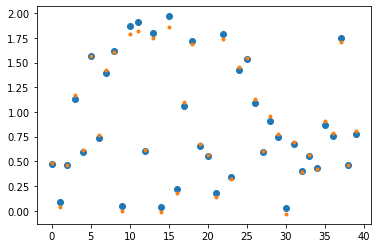

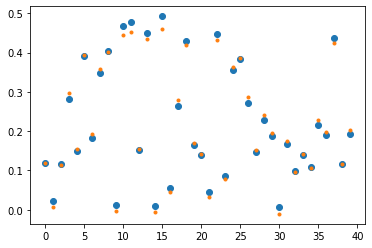

In [50]:
#입력하나
x = np.random.rand(100)
y = np.zeros((100,2))
#출력두개
y[:,0] = x*2.0
y[:,1] = x/2.0



s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

#dnn 정의
model = keras.Sequential()
model.add(Input(1)) #입력노드 한개
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2)) #출력 노드 2개

#컴파일 준비
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

#학습. epochs 1000번 반복, batch size = 20 : gpu core에 한번에 20개씩 할당
start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

#평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#test 데이터를 모델에 적용하여 예측.     
y_ = model.predict(test_x)

#결과 출력
plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], '.')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], '.')
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z*2, y2=z/2인 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 10)                30        
                                                                 
 dense_90 (Dense)            (None, 10)                110       
                                                                 
 dense_91 (Dense)            (None, 2)                 22        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.46471643447876
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0325
loss= 0.0020878694485872984
mae= 0.032513875514268875


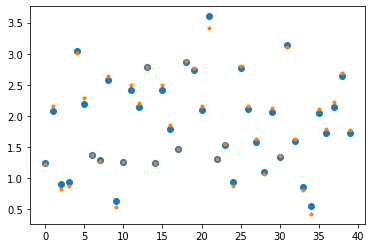

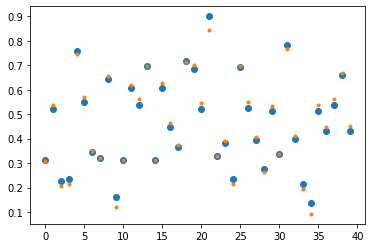

In [51]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], '.')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], '.')
plt.show()




딥러닝 학습에 관계없는 feature를 제거하는 테크닉이 있을까?

A : feature에 대한 것은 딥러닝에서는 신경을 안씀.

머러와 딥러닝 차이가 바로 여기에 있음.

딥러닝은 feature enginierring이 없어.

데이터의 중복없앰. 필요없는 피쳐 없앰. 이런거 안함.

피쳐를 줄이는것에 비해 데이터의 개수, 이데리에션수가 어마어마하게 많음.

물론 전처리는 하지.

머러는 성능에 관계없는 피쳐들을 다 없앰. 

dnn은 블랙박스.
-> 학습을 했는데, 140개의 숫자를 들여댜 본다고 해서. 파악하는 방법은 없음. y=sinx알아낼 방법이 없어.
해석 불가.
안전하다는거아님, 내부를 몰라서 더 취약할수 있고, 해석이 안되니깐 결정된 바를 그냥 따르기도 어려움.


머러에서 decision tree는 화이트 박스. 결과를 트리 역추적하면 어떻게 왔는지 알 수 있음. 이러고 이러고 이러고 이렇습니다. 해석가능.

exAI => explain ai : 설명 가능한 AI.
이것을 가장 활발히 적극적으로 연구하는 기관은 미국방성
국방부의 가장 큰 목적은 전략적 우위. ~~~